# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define the base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Variables needed: Country, temperature, humidity, cloudiness, wind speed
new_city = []
country = []
latit = []
longit = []
max_temp = []
humid_ = []
cloud_ = []
wind = []

print(f'List of Cities')
# Build the query
for city in cities:
    try:
        query_url = base_url + "q=" + city + "&appid=" + weather_api_key
        response = requests.get(query_url).json()
        new_city.append(response['name'])
        country.append(response['sys']['country'])
        latit.append(response['coord']['lat'])
        longit.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid_.append(response['main']['humidity'])
        cloud_.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except:
        print(f'Data not found.')
                
    # Print log
    print(city)

    # Don't attack the server!
    time.sleep(.1)

List of Cities
butaritari
san cristobal
kapaa
avarua
thompson
bluff
new norfolk
micheweni
arraial do cabo
barrow
rikitea
jamestown
kaitangata
katsuura
Data not found.
sataua
Data not found.
lolua
corridonia
saskylakh
ghanzi
sosnovo-ozerskoye
xining
Data not found.
taolanaro
korla
albany
te anau
georgetown
Data not found.
belushya guba
atbasar
punta arenas
Data not found.
illoqqortoormiut
kavaratti
caico
vieux-habitants
killybegs
okhotsk
sao filipe
longyearbyen
bengkulu
khatanga
singaraja
tuktoyaktuk
hermanus
corrientes
ilulissat
hithadhoo
atuona
ushuaia
saint george
sisimiut
Data not found.
tsihombe
qaanaaq
ponta do sol
hobart
kudahuvadhoo
Data not found.
samusu
provideniya
bethel
halifax
mataura
port elizabeth
lebu
cap malheureux
botwood
port alfred
hilo
raudeberg
busselton
airai
neryungri
bireun
pevek
Data not found.
pakwach
pacific grove
gravdal
chokurdakh
yellowknife
avera
banda aceh
kinsale
tasiilaq
ribeira grande
kavieng
nikolskoye
namibe
huejuquilla el alto
porto novo
itarema
ki

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
print(len(new_city), len(country), len(max_temp), len(latit), len(longit), len(humid_), len(cloud_), len(wind))

557 557 557 557 557 557 557 557


In [5]:
weather_df = pd.DataFrame({
    "City": new_city,
    "Country": country,
    "Cloudiness": cloud_,
    "Humidity": humid_,
    "Lat": latit,
    "Lng": longit,
    "Max Temp": max_temp,
    "Wind Speed": wind
})
weather_df.head()

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,KI,1,76,3.07,172.79,301.40,6.36
1,San Cristobal,VE,40,58,7.77,-72.22,302.15,4.10
2,Kapaa,US,90,94,22.08,-159.32,294.15,4.60
3,Avarua,CK,100,83,-21.21,-159.78,300.15,8.20
4,Thompson,CA,5,54,55.74,-97.86,255.15,3.10


In [6]:
weather_df.to_csv("weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

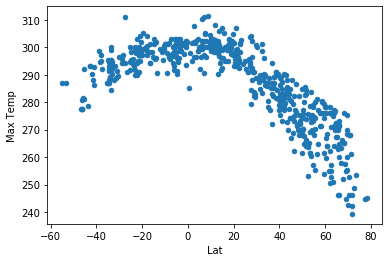

In [7]:
lattmp_plot = weather_df[["Lat", "Max Temp"]]
lattmp_plot.plot(kind='scatter', x="Lat", y="Max Temp")

There is a clear pattern in which the highest latitudes (nearest the poles) have the lowest max temps. Interestingly, this is more pronounced in the Northern Hemisphere than the Southern, which may be due to the land:ocean ratio, i.e. the Northern Hemisphere has more land than the Southern. The large midlatitude landmasses of North America and Eurasia have no comparable counterpart in the Southern Hemisphere. The range from 20-40 degrees latitude is markedly warmer in the Southern Hemisphere than the Northern.

Inhabited lands do not extend as far to the south as they do to the north. South of Ushuaia is the Southern Ocean circling the Antarctic continent. Hence there are no cities in the 60-80 degrees latitude zone in the Southern Hemisphere.

#### Latitude vs. Humidity Plot

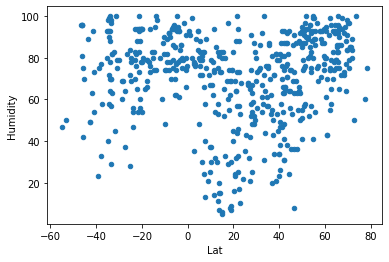

In [8]:
lathum_plot = weather_df[["Lat", "Humidity"]]
lathum_plot.plot(kind='scatter', x="Lat", y="Humidity")

There is little discernible relationship between latitude and humidity, except that somewhat drier conditions prevail in a few localities between 0 and 20 degrees north. These latitudes also have locations of high humidity. Conversely, the highest latitudes are lacking in low humidity localities.

#### Latitude vs. Cloudiness Plot

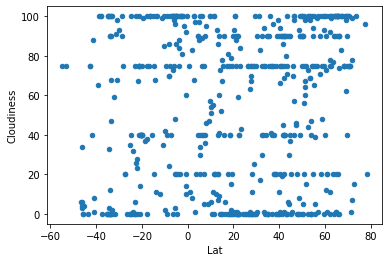

In [9]:
latcloud_plot = weather_df[["Lat", "Cloudiness"]]
latcloud_plot.plot(kind='scatter', x="Lat", y="Cloudiness")

No pattern exists between latitude and cloudiness. The apparent bands at certain percent cloudiness may be an artifact of the way cloudiness is quantified. It is unexpected to find no difference in cloudiness between the notoriously dry Horse Latitudes, where most of the world's deserts are located, and the low pressure belts north and south of them.

#### Latitude vs. Wind Speed Plot

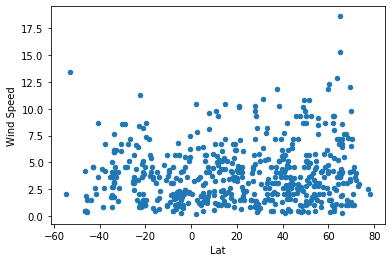

In [10]:
latwind_plot = weather_df[["Lat", "Wind Speed"]]
latwind_plot.plot(kind='scatter', x="Lat", y="Wind Speed")

No apparent relationship exists between latitude and wind speed.

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
# slope, intercept, r_value, p_value, std_err = stats.linregress()

In [12]:
# Create Northern and Southern Hemisphere DataFrames

# Separate Northern from Southern Hemisphere
north_cities = weather_df[weather_df["Lat"] >= 0]
south_cities = weather_df[weather_df["Lat"] < 0]

In [13]:
# Create dataframes
north_cities.head()

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,KI,1,76,3.07,172.79,301.40,6.36
1,San Cristobal,VE,40,58,7.77,-72.22,302.15,4.10
2,Kapaa,US,90,94,22.08,-159.32,294.15,4.60
4,Thompson,CA,5,54,55.74,-97.86,255.15,3.10
9,Barrow,US,1,85,71.29,-156.79,261.15,4.60


In [14]:
south_cities.head()

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
3,Avarua,CK,100,83,-21.21,-159.78,300.15,8.20
5,Bluff,NZ,6,96,-46.60,168.33,277.59,0.45
6,New Norfolk,AU,75,49,-42.78,147.06,293.15,4.60
7,Micheweni,TZ,100,74,-4.97,39.83,302.20,3.37
8,Arraial do Cabo,BR,75,83,-22.97,-42.03,299.15,2.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

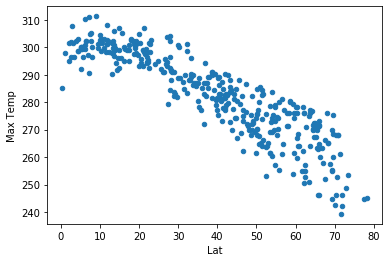

In [15]:
n_lattmp_plot = north_cities[["Lat", "Max Temp"]]
n_lattmp_plot.plot(kind='scatter', x="Lat", y="Max Temp")

In the Northern Hemisphere, increasing distance from the equator correlates with decreasing max temp, but also with more variation in temp, as the high latitude temps show much wider range than the equatorial temps. Also, the highest temps are not at the equator, but near 10 degrees north.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

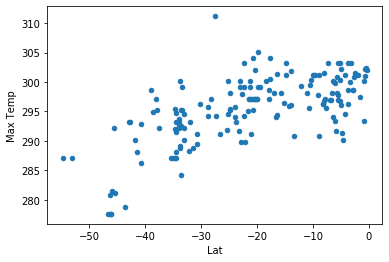

In [16]:
s_lattmp_plot = south_cities[["Lat", "Max Temp"]]
s_lattmp_plot.plot(kind='scatter', x="Lat", y="Max Temp")

In the Southern Hemisphere, although the same pattern exists with lower max temps the further one goes from the equator, it is less sharp. It might be instructive to factor in altitude, since even at the equator, there are cities in the Andes with cold climates due to high altitude. Nevertheless, the amount of variation appears more widespread than that, and it may be that the Southern Hemisphere's higher proportion of ocean relative to the Northern Hemisphere is adding more variables.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

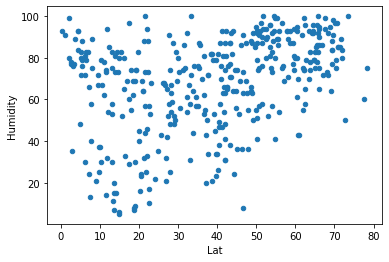

In [17]:
n_lathum_plot = north_cities[["Lat", "Humidity"]]
n_lathum_plot.plot(kind='scatter', x="Lat", y="Humidity")

In the Northern Hemisphere, there is a definite lack of dry climates further from the equator, although even south of 40 degrees, where dry localities are present, there are still a lot of humid localities, too, and the max humidity does not change much with latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

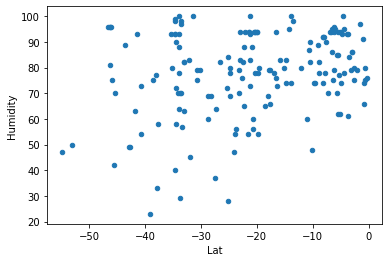

In [18]:
s_lathum_plot = south_cities[["Lat", "Humidity"]]
s_lathum_plot.plot(kind='scatter', x="Lat", y="Humidity")

The Southern Hemisphere shows no clear cut pattern in humidity vs. latitude, except that on the whole, humid climates are slightly more prevalent than dry ones. This, again, may be due to the lack of expansive landmasses and prevalence of maritime climates -- Chile's Atacama Desert, where no rain falls, is nevertheless watered by coastal fog.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

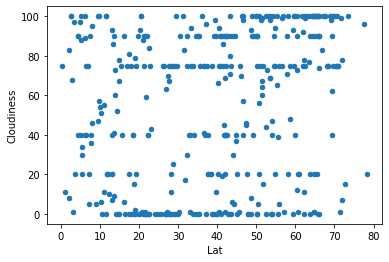

In [19]:
n_latcld_plot = north_cities[["Lat", "Cloudiness"]]
n_latcld_plot.plot(kind='scatter', x="Lat", y="Cloudiness")

As on the global graph, the Northern Hemisphere graph shows no correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

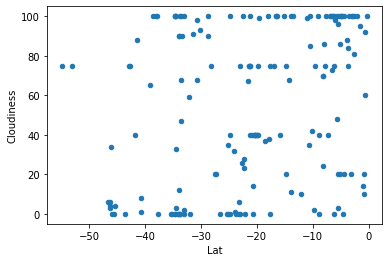

In [20]:
s_latcld_plot = south_cities[["Lat", "Cloudiness"]]
s_latcld_plot.plot(kind='scatter', x="Lat", y="Cloudiness")

As on the global graph, the Southern Hemisphere graph shows no correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

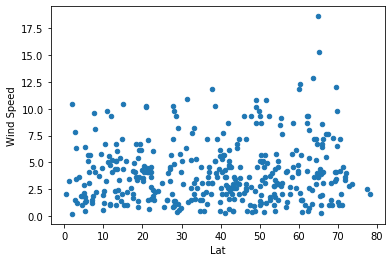

In [21]:
n_latwnd_plot = north_cities[["Lat", "Wind Speed"]]
n_latwnd_plot.plot(kind='scatter', x="Lat", y="Wind Speed")

Wind speed is highly variable at every latitude, with no one latitude showing consistently higher or lower wind speeds. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

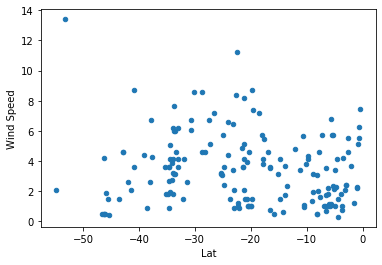

In [22]:
s_latwnd_plot = south_cities[["Lat", "Wind Speed"]]
s_latwnd_plot.plot(kind='scatter', x="Lat", y="Wind Speed")

Wind speed varies in the Southern Hemisphere also, with one notable distiction: the few localities furthest south average higher wind speeds. This is likely due to their location in the Southern Ocean, with the notorious "Roaring Forties," "Furious Fifties," and "Screaming Sixties," with winds meeting little resistance from land to slow them. Unexpectedly, though, even the highest wind speed in the Southern Hemisphere, near 45 degrees south, was less than the highest in the Northern Hemisphere, near 65 degrees north. This may be due to a lack of cities in Antarctica.